In [64]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
from sklearn.experimental import enable_iterative_imputer
import napari
from sklearn.impute import IterativeImputer
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-multiple_templates/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-multiple_templates 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



# Split a tracklet and resave

In [6]:
df_tracklets = project_data.df_all_tracklets

In [15]:
old_name = 'neuron1'
i_time = 3
new_name = 'new_neuron1'

In [19]:
this_tracklet = df_tracklets[[old_name]]
old_tracklet = this_tracklet.copy()
new_tracklet = this_tracklet.copy()
this_tracklet

bodyparts   neuron1                                   
coords            z           x           y likelihood
0          4.535754  313.322332  433.174917   0.606776
1          4.195519  298.374745  412.863544   0.696387
2          3.580764  287.709001  407.241677   0.865204
3          3.619469  271.936789  396.795196   0.546072
4          3.527294  264.609756  415.465738   0.567441
...             ...         ...         ...        ...
1494            NaN         NaN         NaN        NaN
1495            NaN         NaN         NaN        NaN
1496            NaN         NaN         NaN        NaN
1497            NaN         NaN         NaN        NaN
1498            NaN         NaN         NaN        NaN

[1499 rows x 4 columns]

In [20]:
old_tracklet.iloc[i_time:] = np.nan
old_tracklet

bodyparts   neuron1                                   
coords            z           x           y likelihood
0          4.535754  313.322332  433.174917   0.606776
1          4.195519  298.374745  412.863544   0.696387
2          3.580764  287.709001  407.241677   0.865204
3               NaN         NaN         NaN        NaN
4               NaN         NaN         NaN        NaN
...             ...         ...         ...        ...
1494            NaN         NaN         NaN        NaN
1495            NaN         NaN         NaN        NaN
1496            NaN         NaN         NaN        NaN
1497            NaN         NaN         NaN        NaN
1498            NaN         NaN         NaN        NaN

[1499 rows x 4 columns]

In [43]:
new_tracklet.iloc[:i_time] = np.nan
new_tracklet.rename(columns={old_name: new_name}, level=0, inplace=True)
new_tracklet

bodyparts new_neuron1                                   
coords              z           x           y likelihood
0                 NaN         NaN         NaN        NaN
1                 NaN         NaN         NaN        NaN
2                 NaN         NaN         NaN        NaN
3            3.619469  271.936789  396.795196   0.546072
4            3.527294  264.609756  415.465738   0.567441
...               ...         ...         ...        ...
1494              NaN         NaN         NaN        NaN
1495              NaN         NaN         NaN        NaN
1496              NaN         NaN         NaN        NaN
1497              NaN         NaN         NaN        NaN
1498              NaN         NaN         NaN        NaN

[1499 rows x 4 columns]

In [116]:
new_tracklet[new_name]['z'].count()

114

In [28]:
df_tracklets[old_name] = old_tracklet[old_name]

In [92]:
tmp = pd.concat([df_tracklets, new_tracklet], axis=1)
tmp[old_name] = old_tracklet[old_name].copy()
tmp

bodyparts   neuron0                                      neuron1              \
coords            z           x           y likelihood         z           x   
0          4.941084  297.763551  424.093480   0.713248  4.535754  313.322332   
1          5.009791  280.078982  407.770888   0.500743  4.195519  298.374745   
2          6.264613  272.766185  406.453803   0.865892  3.580764  287.709001   
3          5.469434  255.926792  396.395472   0.787858       NaN         NaN   
4          5.080983  249.135213  407.994215   0.696746       NaN         NaN   
...             ...         ...         ...        ...       ...         ...   
1494            NaN         NaN         NaN        NaN       NaN         NaN   
1495            NaN         NaN         NaN        NaN       NaN         NaN   
1496            NaN         NaN         NaN        NaN       NaN         NaN   
1497            NaN         NaN         NaN        NaN       NaN         NaN   
1498            NaN         NaN         NaN        NaN       NaN         NaN   

bodyparts                          neuron2              ... neuron15328  \
coords              y likelihood         z           x  ...           y   
0          433.174917   0.606776  5.660345  279.918966  ...         NaN   
1          412.863544   0.696387  5.410550  261.707951  ...         NaN   
2          407.241677   0.865204  5.688216  253.720131  ...         NaN   
3                 NaN        NaN  5.850042  237.420388  ...         NaN   
4                 NaN        NaN  6.719684  232.159930  ...         NaN   
...               ...        ...       ...         ...  ...         ...   
1494              NaN        NaN       NaN         NaN  ...         NaN   
1495              NaN        NaN       NaN         NaN  ...         NaN   
1496              NaN        NaN       NaN         NaN  ...  402.033898   
1497              NaN        NaN       NaN         NaN  ...  403.336788   
1498              NaN        NaN       NaN         NaN  ...  403.416667   

bodyparts            neuron15329                                     \
coords    likelihood           z           x           y likelihood   
0                NaN         NaN         NaN         NaN        NaN   
1                NaN         NaN         NaN         NaN        NaN   
2                NaN         NaN         NaN         NaN        NaN   
3                NaN         NaN         NaN         NaN        NaN   
4                NaN         NaN         NaN         NaN        NaN   
...              ...         ...         ...         ...        ...   
1494             NaN         NaN         NaN         NaN        NaN   
1495             NaN         NaN         NaN         NaN        NaN   
1496        0.708359   25.977816  211.312287  181.914676   0.646527   
1497        0.704018   23.024194  233.271505  180.751792   0.755784   
1498        0.000000   21.767921  236.520227  183.278921   0.000000   

bodyparts new_neuron1                                     
coords              z           x           y likelihood  
0                 NaN         NaN         NaN        NaN  
1                 NaN         NaN         NaN        NaN  
2                 NaN         NaN         NaN        NaN  
3            3.619469  271.936789  396.795196   0.546072  
4            3.527294  264.609756  415.465738   0.567441  
...               ...         ...         ...        ...  
1494              NaN         NaN         NaN        NaN  
1495              NaN         NaN         NaN        NaN  
1496              NaN         NaN         NaN        NaN  
1497              NaN         NaN         NaN        NaN  
1498              NaN         NaN         NaN        NaN  

[1499 rows x 48708 columns]

In [93]:
tmp[old_name], tmp[new_name]


(coords         z           x           y  likelihood
 0       4.535754  313.322332  433.174917    0.606776
 1       4.195519  298.374745  412.863544    0.696387
 2       3.580764  287.709001  407.241677    0.865204
 3            NaN         NaN         NaN         NaN
 4            NaN         NaN         NaN         NaN
 ...          ...         ...         ...         ...
 1494         NaN         NaN         NaN         NaN
 1495         NaN         NaN         NaN         NaN
 1496         NaN         NaN         NaN         NaN
 1497         NaN         NaN         NaN         NaN
 1498         NaN         NaN         NaN         NaN
 
 [1499 rows x 4 columns],
 coords         z           x           y  likelihood
 0            NaN         NaN         NaN         NaN
 1            NaN         NaN         NaN         NaN
 2            NaN         NaN         NaN         NaN
 3       3.619469  271.936789  396.795196    0.546072
 4       3.527294  264.609756  415.465738    0.567441


In [88]:
df_tracklets[[old_name]]

bodyparts   neuron1                                   
coords            z           x           y likelihood
0          4.535754  313.322332  433.174917   0.606776
1          4.195519  298.374745  412.863544   0.696387
2          3.580764  287.709001  407.241677   0.865204
3               NaN         NaN         NaN        NaN
4               NaN         NaN         NaN        NaN
...             ...         ...         ...        ...
1494            NaN         NaN         NaN        NaN
1495            NaN         NaN         NaN        NaN
1496            NaN         NaN         NaN        NaN
1497            NaN         NaN         NaN        NaN
1498            NaN         NaN         NaN        NaN

[1499 rows x 4 columns]

# Load saved dataframes from disk and make sure they worked

In [124]:
# First, just the matches
import pickle
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-imputation/3-tracking/manual_annotation/global2tracklet_manual-1-1-1-1-1.pickle"
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-manual_annotation/3-tracking/manual_annotation/global2tracklet_manual.pickle"

with open(fname, 'rb') as f:
    matches = pickle.load(f)

In [125]:
matches['neuron_001']

['neuron16613',
 'neuron16350',
 'neuron13780',
 'neuron14066',
 'neuron212',
 'neuron798',
 'neuron798',
 'neuron798',
 'neuron1013699',
 'neuron798',
 'neuron1013699',
 'neuron798',
 'neuron1013699',
 'neuron1519']

In [130]:
type(indices[0]) == str

True

In [119]:
# Second, the split tracklets
import pandas as pd
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-imputation/3-tracking/manual_annotation/manually_split_tracklets-1-1-1-1-1.h5"

df = pd.read_hdf(fname)

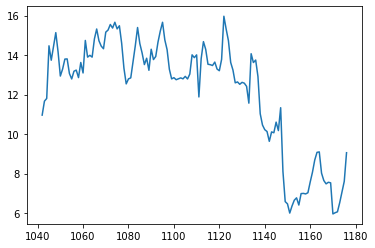

In [123]:
plt.figure()
df['neuron10733']['z'].plot()

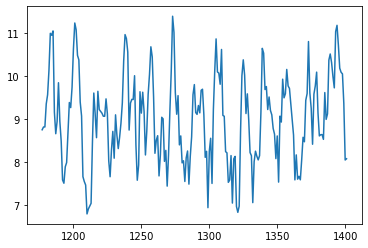

In [121]:

df['neuron1012177']['z'].plot()

# Scratch

In [63]:
list(df_tracklets['neuron0'].index).index(1498)

1498

In [67]:
project_data.segmentation_metadata.mask_index_to_zxy(0, 10)

array([  6.05782793, 294.80959097, 410.4203103 ])

In [82]:
t0 = df_tracklets['neuron1000'].dropna().index

In [83]:
t1 = df_tracklets['neuron1'].dropna().index

In [85]:
len(t0.intersection(t1))

0

In [133]:
k = list(df_tracklets.columns.levels[0])[:5]

In [137]:
all(map(lambda s: isinstance(s, str), k))

True

In [140]:
df_tracklets.shape[1]

48704

In [141]:
len(list(df_tracklets.columns.levels[0]))

12176